In [1]:
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../utils/')

import utils.io_manager as iom
import utils.data as dat
import utils.variables as vrb
import utils.models as mdl
import utils.bootcampviztools as btz

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error



# 1  - EDA

## Features description
<table>
<tr>
    <th>Column name</th>
    <th>Type</th>
    <th>Description</th>
    <th>Comments</th>
</tr>
<tr>
    <td>Open</td>
    <td>Numeric</td>
    <td>First price within the timeframe</td>
    <td></td>
</tr>
<tr>
    <td>High</td>
    <td>Numeric</td>
    <td>Maximum price reached within the timeframe</td>
    <td></td>
</tr>
<tr>
    <td>Low</td>
    <td>Numeric</td>
    <td>Minimun price reached within the timeframe</td>
    <td></td>
</tr>
<tr>
    <td>Close</td>
    <td>Numeric</td>
    <td>Last price within the timeframe</td>
    <td></td>
</tr>
<tr>
    <td>Volume</td>
    <td>Numeric</td>
    <td>Number of assets that have been bought or sold within the timeframe</td>
    <td></td>
</tr>
<tr>
    <td>Body</td>
    <td>Numeric</td>
    <td>Subtraction of the Open column and Close columns</td>
    <td>Calculated column (not in original dataset)</td>
</tr>
<tr>
    <td>UpperShadow</td>
    <td>Numeric</td>
    <td>Subtraction of the High column and Open/Close columns</td>
    <td>Calculated column (not in original dataset)</td>
</tr>
<tr>
    <td>LowerShadow</td>
    <td>Numeric</td>
    <td>Subtraction of the Low  column and Open/Close columns</td>
    <td>Calculated column (not in original dataset)</td>
</tr>
<tr>
    <td>DayOfWeek</td>
    <td>Categorical</td>
    <td>Day of week of the given date</td>
    <td>Calculated column (not in original dataset)</td>
</tr>
</table>

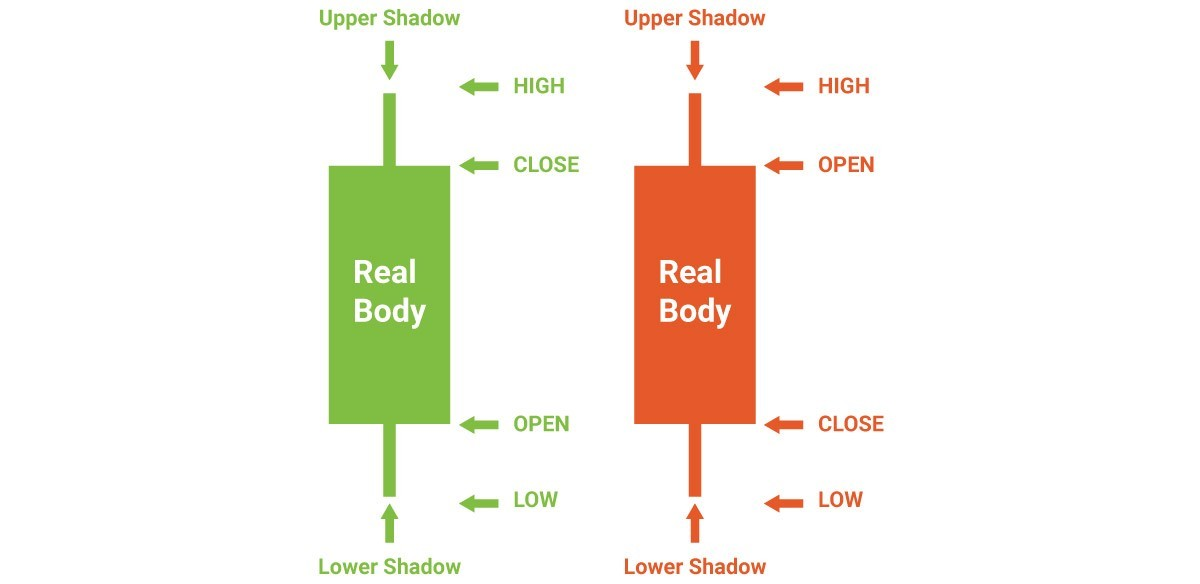


In [2]:
# Original data set
df_original = iom.read_data()
df_train, _, _ = dat.get_train_valid_test_sets(df_original, df_original.columns)
df_train

,Open,High,Low,Close,Volume
DateTime,,,,,
2017-10-01 21:00:00,1.17950,1.18090,1.17948,1.18067,1228008000
2017-10-01 22:00:00,1.18067,1.18150,1.18019,1.18111,3014776000
2017-10-01 23:00:00,1.18110,1.18113,1.18060,1.18079,2486369000
2017-10-02 00:00:00,1.18079,1.18079,1.17876,1.17893,7543814000
2017-10-02 01:00:00,1.17895,1.17912,1.17705,1.17741,10005649000
...,...,...,...,...,...
2022-02-28 19:00:00,1.12149,1.12236,1.12034,1.12222,7972024000
2022-02-28 20:00:00,1.12223,1.12229,1.12088,1.12103,9562054000
2022-02-28 21:00:00,1.12103,1.12199,1.12098,1.12183,2098312000


In [3]:
# Dataframe with new calculated columns
df_train = dat.prepare_dataframe(df_train)
df_train

,Date,Open,High,Low,Close,Volume,Body,UpperShadow,LowerShadow,DayOfWeek
DateTime,,,,,,,,,,
2017-10-01 21:00:00,2017-10-01 21:00:00,1.17950,1.18090,1.17948,1.18067,1228008000,0.00117,0.00023,0.00002,Sunday
2017-10-01 22:00:00,2017-10-01 22:00:00,1.18067,1.18150,1.18019,1.18111,3014776000,0.00044,0.00039,0.00048,Sunday
2017-10-01 23:00:00,2017-10-01 23:00:00,1.18110,1.18113,1.18060,1.18079,2486369000,-0.00031,0.00003,0.00019,Sunday
2017-10-02 00:00:00,2017-10-02 00:00:00,1.18079,1.18079,1.17876,1.17893,7543814000,-0.00186,0.00000,0.00017,Monday
2017-10-02 01:00:00,2017-10-02 01:00:00,1.17895,1.17912,1.17705,1.17741,10005649000,-0.00154,0.00017,0.00036,Monday
...,...,...,...,...,...,...,...,...,...,...
2022-02-28 19:00:00,2022-02-28 19:00:00,1.12149,1.12236,1.12034,1.12222,7972024000,0.00073,0.00014,0.00115,Monday
2022-02-28 20:00:00,2022-02-28 20:00:00,1.12223,1.12229,1.12088,1.12103,9562054000,-0.00120,0.00006,0.00015,Monday
2022-02-28 21:00:00,2022-02-28 21:00:00,1.12103,1.12199,1.12098,1.12183,2098312000,0.00080,0.00016,0.00005,Monday


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27462 entries, 2017-10-01 21:00:00 to 2022-02-28 23:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         27462 non-null  datetime64[ns]
 1   Open         27462 non-null  float64       
 2   High         27462 non-null  float64       
 3   Low          27462 non-null  float64       
 4   Close        27462 non-null  float64       
 5   Volume       27462 non-null  int64         
 6   Body         27462 non-null  float64       
 7   UpperShadow  27462 non-null  float64       
 8   LowerShadow  27462 non-null  float64       
 9   DayOfWeek    27462 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.3+ MB


In [5]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,27462,2019-12-16 09:13:19.650425856,2017-10-01 21:00:00,2018-11-07 05:15:00,2019-12-16 09:30:00,2021-01-24 09:45:00,2022-02-28 23:00:00,NaN
Open,27462.0,1.15665,1.06544,1.123933,1.15775,1.18487,1.25489,0.041041
High,27462.0,1.157316,1.06677,1.12458,1.158425,1.18549,1.25553,0.041074
Low,27462.0,1.155992,1.06358,1.123382,1.15708,1.18429,1.25432,0.041009
Close,27462.0,1.156652,1.06545,1.12395,1.15775,1.18487,1.2549,0.041041
Volume,27462.0,8713968321.161022,2500000.0,2735650000.0,5886133500.0,12219060250.0,105999916000.0,8540694929.832376
Body,27462.0,0.000001,-0.01189,-0.00042,0.00001,0.00043,0.00944,0.000972
UpperShadow,27462.0,0.000342,0.0,0.0001,0.00023,0.00046,0.00691,0.000374
LowerShadow,27462.0,0.000335,0.0,0.0001,0.00022,0.00045,0.00471,0.000365


# Serie analysis

In [6]:
target = dat.TARGET # Price Close

### Target over time

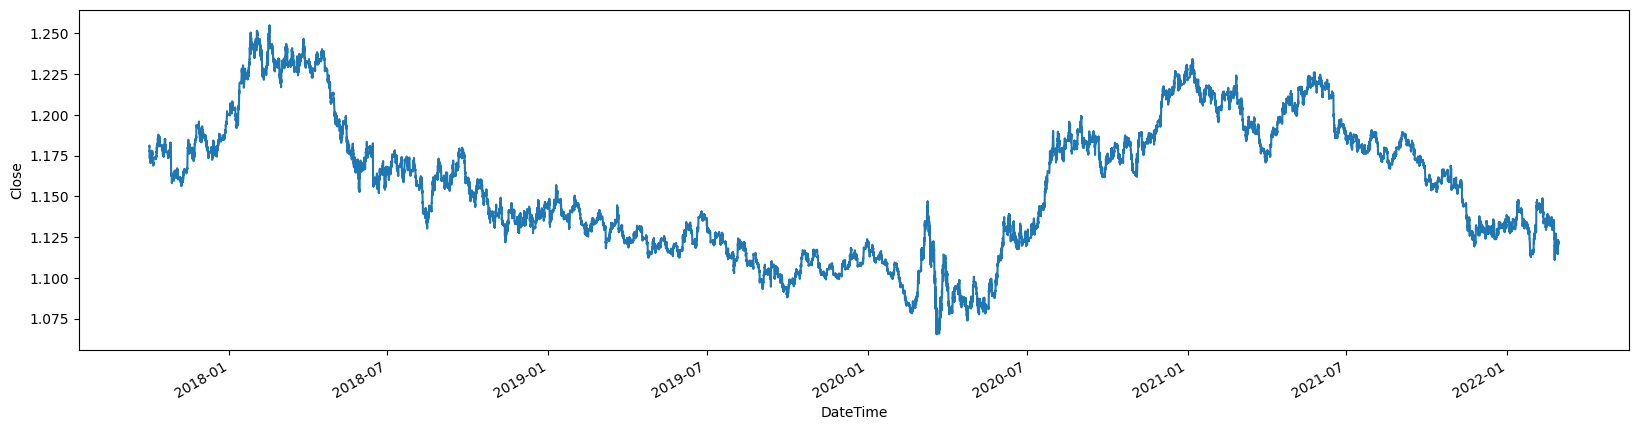

In [7]:
df_train[target].plot(figsize = (20,5))
plt.ylabel(target);

### Years comparation

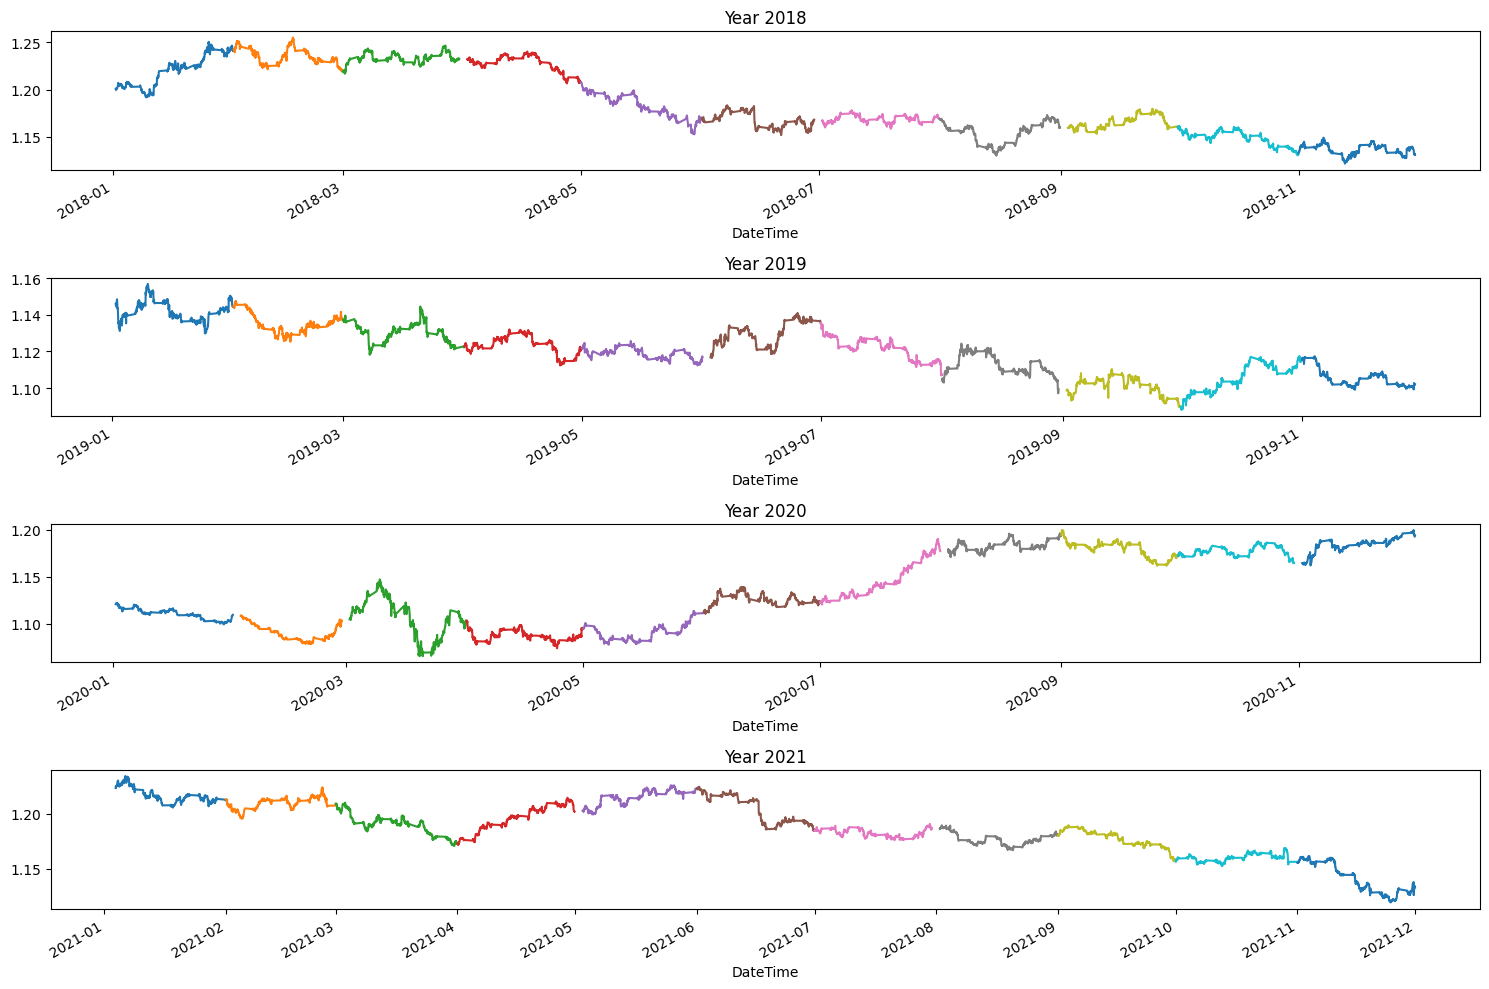

In [8]:
year_start = 2018
year_finish = 2022
fig, axes = plt.subplots(len(range(year_start,year_finish)),1, figsize = (15,10))
for indice, year in enumerate(range(year_start,year_finish)):
    for month in range(1,12):
        df_train[f"{year}-{month:02}":f"{year}-{month:02}"][vrb.COLUMN_CLOSE].plot(ax= axes[indice], legend = False)
        axes[indice].set_title(f"Year {year}")
plt.tight_layout();

### AD Fuller test

In [9]:
result = adfuller(df_train[target].values)
print(f"Result: {result}")
print(f"Ad Fuller p-value:{result[1]}")

Result: (-1.8726192369608319, 0.34504945722019154, 27, 27434, {'1%': -3.430588387109937, '5%': -2.861645360296976, '10%': -2.566826080133819}, -302138.66474490205)
Ad Fuller p-value:0.34504945722019154


We cannot say that the series is stationary

### Features comparation

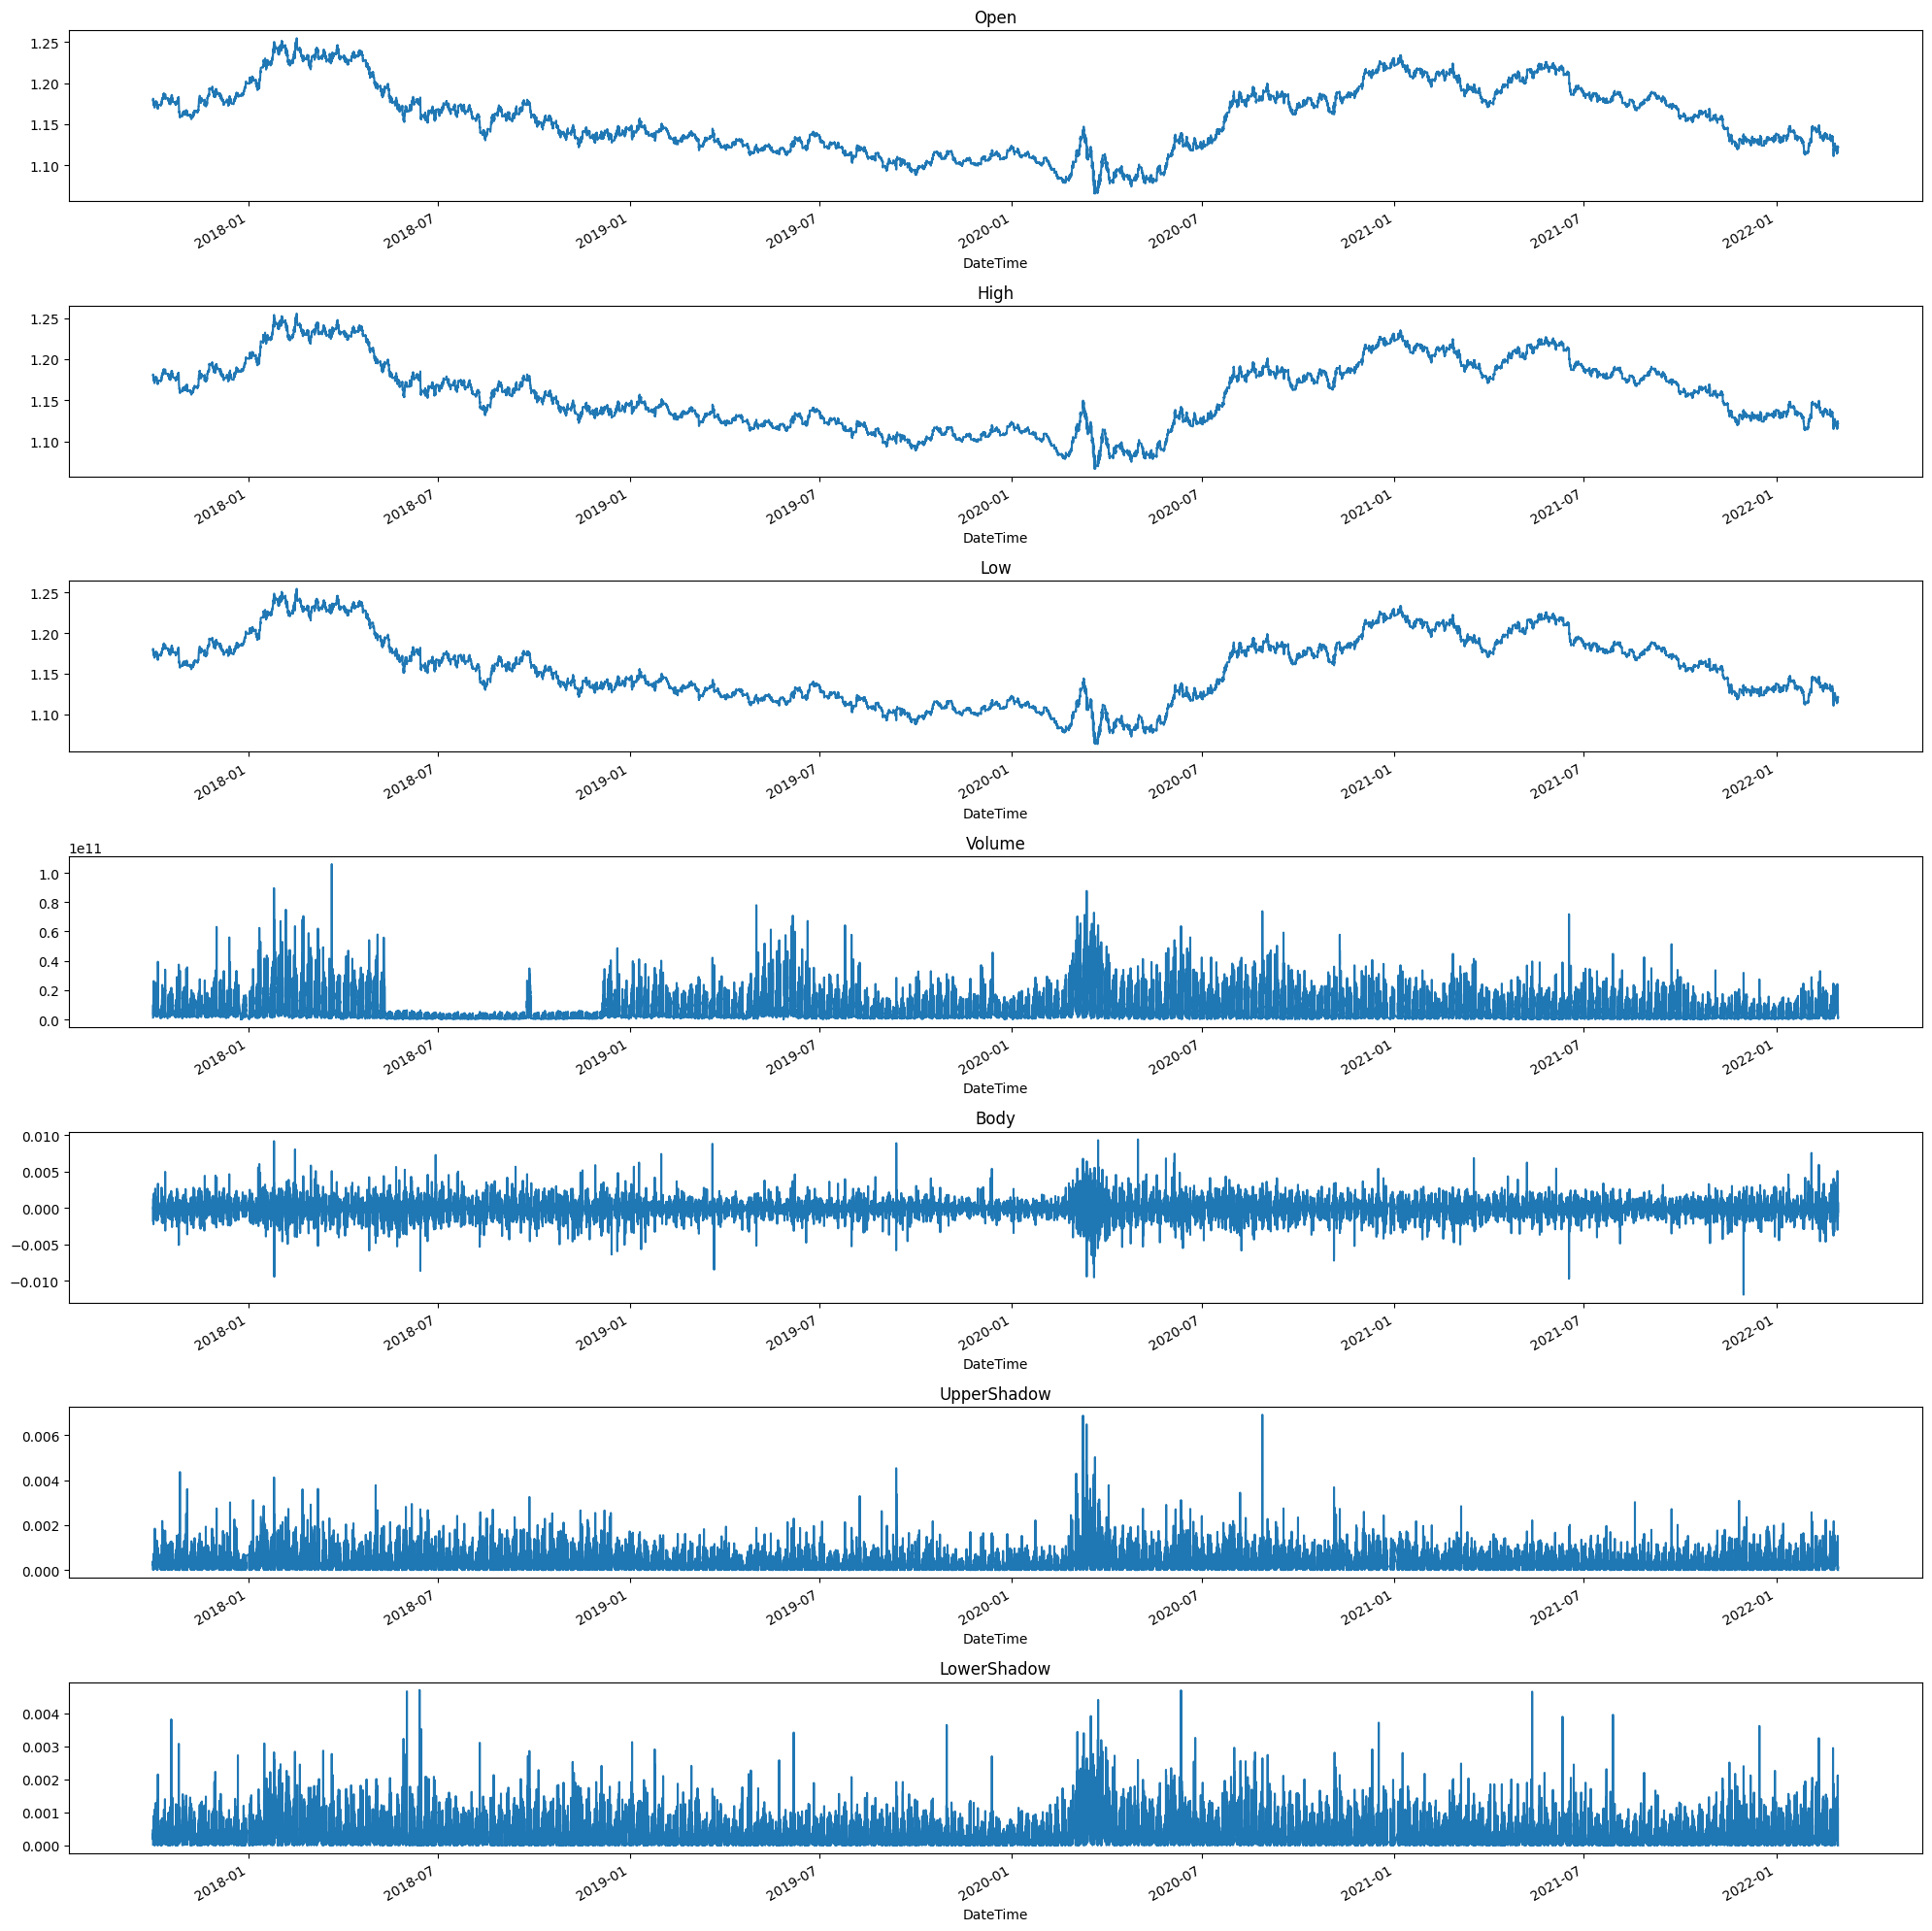

In [10]:
series_col = dat.get_features_num(df_train, remove_target=True)

fig,axs = plt.subplots(len(series_col),1, figsize = (20,20))
for indice,col in enumerate(series_col):
    df_train[col].plot(ax = axs[indice])
    axs[indice].set_title(col)
plt.tight_layout();
    

# Target

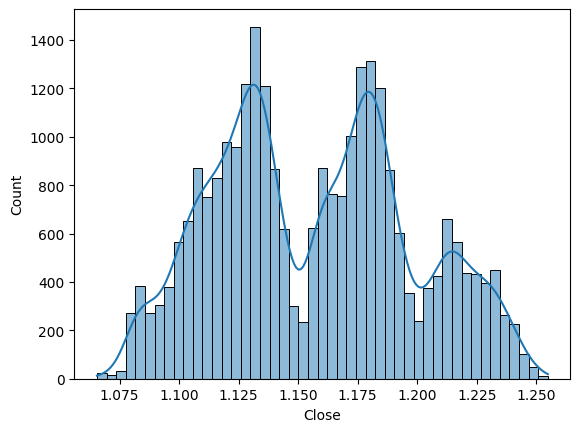

In [11]:
# Target distribution
sns.histplot(x = target, data = df_train, kde = True);

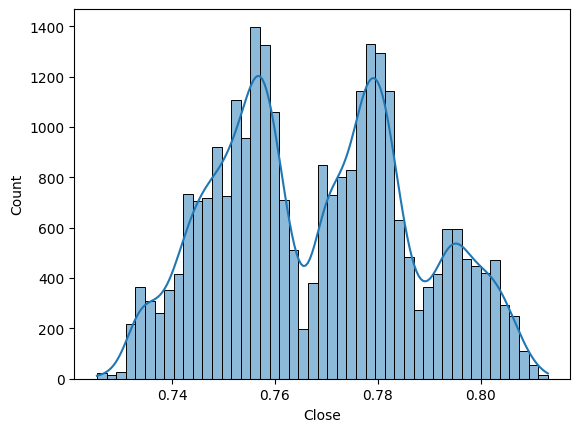

In [12]:
# Target logarithm
sns.histplot( data = df_train[target].apply(np.log1p), kde = True);

Applying the logarithm to the target does not change the data structure. The original value of target will be used

# Features categorical

In [13]:
features_cat = [vrb.COLUMN_DAY_OF_WEEK]
features_cat

['DayOfWeek']

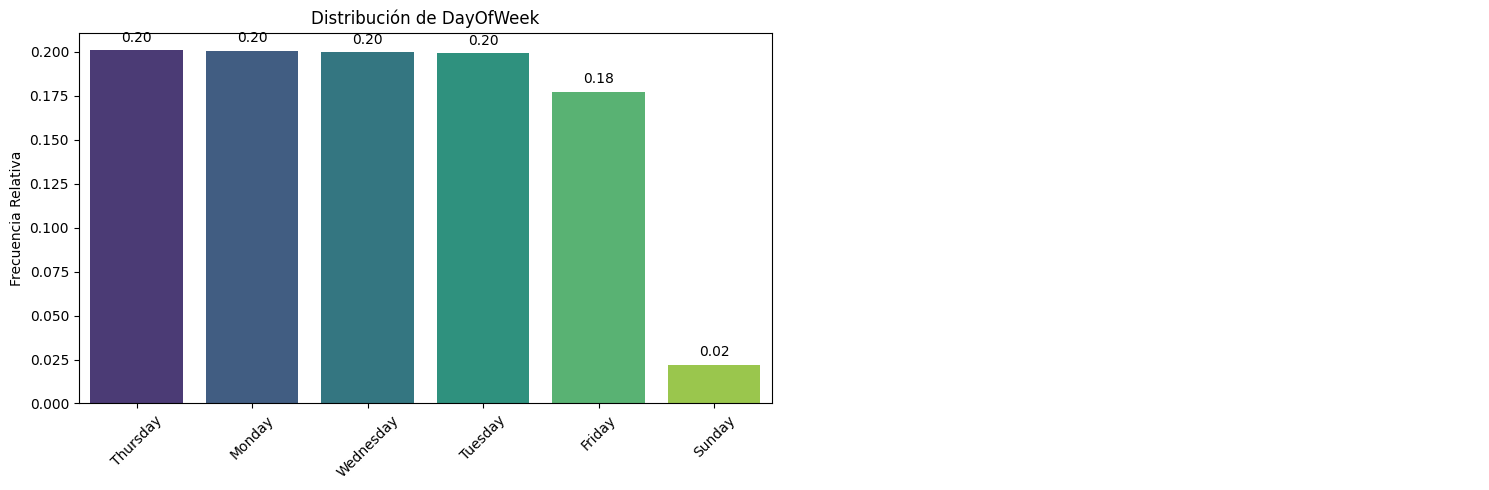

In [14]:
btz.pinta_distribucion_categoricas(df_train, features_cat, relativa=True, mostrar_valores=True)

# Features numeric

In [15]:
features_num = dat.get_features_num(df_train, remove_target=True)
features_num

['Open', 'High', 'Low', 'Volume', 'Body', 'UpperShadow', 'LowerShadow']

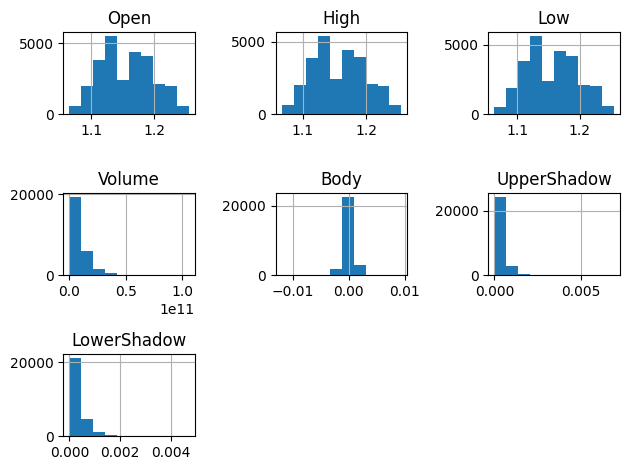

In [16]:
df_train[features_num].hist()
plt.tight_layout()

In [17]:
# Aapply the log to numeric variables and MinMaxScaler to Volume
df_transform = dat.transform_data(df_train, set_dummies=False)

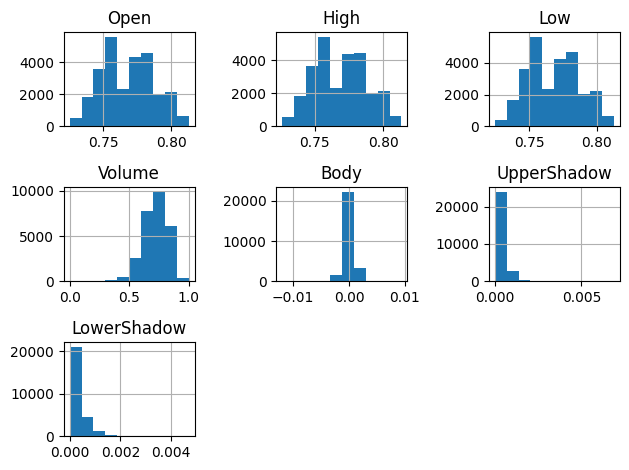

In [18]:
df_transform[features_num].hist()
plt.tight_layout()

The volume is normalized by applying the logarithm. The rest of the variables remain the same shape

<Axes: >

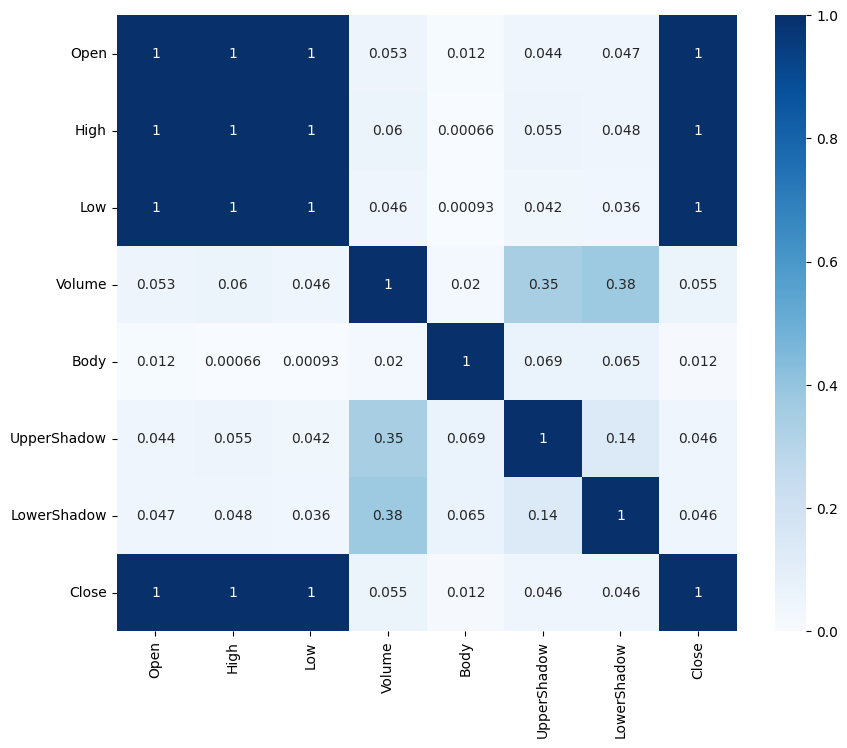

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(np.abs(df_train[features_num + [target]].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin = 0, vmax = 1) 

The variables Open, High and Low are highly correlated with the target and will be excluded from the model

# 2  -  Model configuration

After testing different models, the model has been selected as the base line 'model_5_GRU32_univar1_out1'. 

    - Univar(target) 
    - Model based on GRU layer 32 units
    - 1 output period

In [20]:
# Predict next value (1)
prediction_interval = 1

# Read data set, calculated columns, features transform and batch building
df_model = dat.get_data_model()

columns = dat.get_colums_target_features_1()
train_set, valid_set, test_set =  mdl.get_timeseries_train_valid_test_sets(df_model, columns, prediction_interval)

Model configuration and compilation

In [21]:
model_name = "SELECTED_MODEL_GRU32_output_period_1"
# Create new model instance and compilation
selected_model = mdl.add_model({}, "selected_model", "GRU", prediction_interval, columns, 32)
mdl.model_compile(selected_model)

Model created: selected_model_GRU32_univar1_out1 => [<GRU name=gru, built=True>, <Dense name=dense, built=True>]


Model fitting and save it to disk

In [22]:
total_epochs = 5
history = mdl.model_fit(selected_model, train_set, valid_set, epochs=total_epochs, patience=None, save_to=model_name)

>>> Fitting model patience: 5
Epoch 1/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - loss: 0.0152 - mae: 0.0722 - root_mean_squared_error: 0.1420 - val_loss: 7.4044e-04 - val_mae: 0.0357 - val_root_mean_squared_error: 0.0385
Epoch 2/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 1.1002e-04 - mae: 0.0126 - root_mean_squared_error: 0.0148 - val_loss: 4.5861e-04 - val_mae: 0.0283 - val_root_mean_squared_error: 0.0303
Epoch 3/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 6.2845e-05 - mae: 0.0095 - root_mean_squared_error: 0.0112 - val_loss: 2.2979e-04 - val_mae: 0.0200 - val_root_mean_squared_error: 0.0214
Epoch 4/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 3.4240e-05 - mae: 0.0070 - root_mean_squared_error: 0.0083 - val_loss: 1.3250e-04 - val_mae: 0.0153 - val_root_mean_squared_error: 0.0163
Epoch 5/5
857/857 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 1.8218e-05 - mae: 0.0051 - root_mean_squared_error: 0.0060 - val_loss: 5.2958e-05 - val_mae: 0.0095 - val_root_mean_s

Model evaluation

In [23]:
valid_loss, valid_mae, valid_rmse = mdl.model_evaluate(selected_model, valid_set)

print()
print(f"Validation loss: {valid_loss}")
print(f"Validation MAE: {valid_mae}")
print(f"Validation RMSE: {valid_rmse}")

294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.4804e-05 - mae: 0.0097 - root_mean_squared_error: 0.0103

Validation loss: 5.295757364365272e-05
Validation MAE: 0.009538133628666401
Validation RMSE: 0.0102915083989501


# 3  -  Prediction

In [24]:
prediction_model = iom.read_model(model_name)

_, _, df_test = dat.get_train_valid_test_sets(df_original, columns)

Predict all test records including previous 'seq_length' records

In [25]:
start_time = '2023-09-04 00:00:00'
finish_time = '2023-09-10 21:00:00'

idx_start_time = df_test.index.get_loc(start_time)
idx_finish_time = df_test.index.get_loc(finish_time)

predictions_count = idx_finish_time - idx_start_time
column_predict ="Predict"

seq_length = vrb.DEFAULT_SEQUENCE_LENGTH

df_results = df_test[idx_start_time: idx_start_time + predictions_count].copy()
df_results[column_predict] = 0.0

for i in range(0,predictions_count):
    idx_from = idx_start_time - seq_length + i
    idx_to = idx_start_time - 1 + i
    print(f"Predict {i+1}/{predictions_count} => df_test[{idx_from}:{idx_to}]")
    X = df_test.to_numpy()[np.newaxis, idx_from: idx_to, np.newaxis]
    df_results.iloc[i, df_results.columns.get_loc(column_predict)] = prediction_model.predict(X)

df_results[column_predict] = round(df_results[column_predict], 6)

Predict 1/117 => df_test[24:71]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Predict 2/117 => df_test[25:72]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predict 3/117 => df_test[26:73]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predict 4/117 => df_test[27:74]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predict 5/117 => df_test[28:75]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predict 6/117 => df_test[29:76]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predict 7/117 => df_test[30:77]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predict 8/117 => df_test[31:78]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predict 9/117 => df_test[32:79]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predict 10/117 => df_test[33:80]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predict 11/117 => df_test[34:81]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predict 12/117 => df_test[35:82]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predict 13/117 => df_test[36:83]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predict 14/117 => df_test[37:84]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predict 15/1

In [26]:
df_results

,Close,Predict
DateTime,,
2023-09-04 00:00:00,1.07786,1.085342
2023-09-04 01:00:00,1.07764,1.085364
2023-09-04 02:00:00,1.07856,1.085497
2023-09-04 03:00:00,1.07857,1.085495
2023-09-04 04:00:00,1.07867,1.085840
...,...,...
2023-09-08 16:00:00,1.07043,1.079818
2023-09-08 17:00:00,1.07056,1.079640
2023-09-08 18:00:00,1.06978,1.079366


Paint predictions VS original values

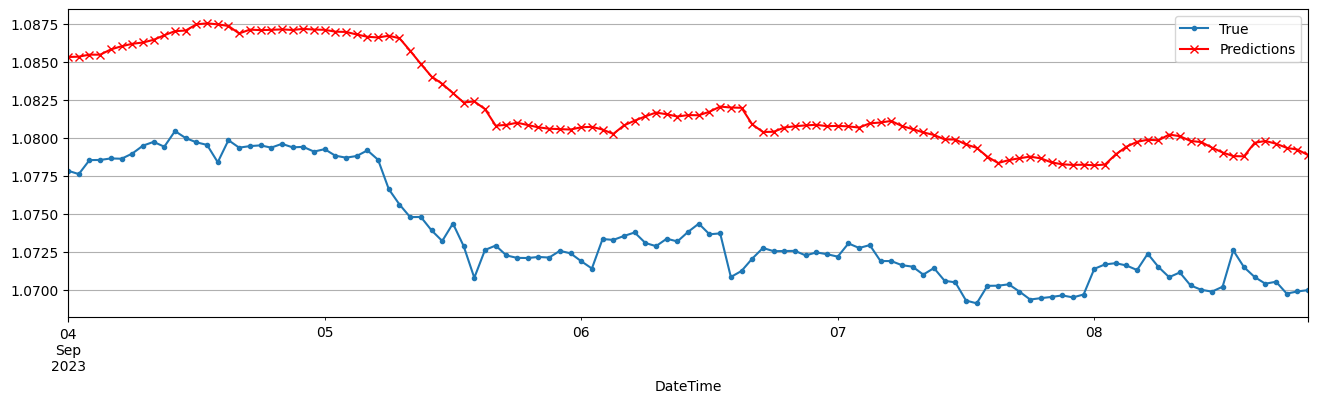

In [27]:
fig, ax = plt.subplots(figsize=(16, 4))
df_results[vrb.COLUMN_CLOSE].plot(label="True", marker=".", ax=ax)
df_results[column_predict].plot(label="Predictions", grid=True, marker="x", color="r", ax=ax)
plt.legend()
plt.show();

Results will be better with a longer fitting (epochs=500)

In [28]:
print("RMSE:", np.sqrt(mean_squared_error(df_results[vrb.COLUMN_CLOSE], df_results[column_predict])))
print("MAPE:", mean_absolute_percentage_error(df_results[vrb.COLUMN_CLOSE], df_results[column_predict]) * 100)

RMSE: 0.00848531564014095
MAPE: 0.784299677378718
